In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/Users/vanshpahwa/Downloads/linear_regression_dataset.csv")
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [3]:
print(df.isna().sum())

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64


In [5]:
df.fillna(df.mean(), inplace=True)

In [7]:
print(df.isna().sum())

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64


Weights for the respective features are :
[[ 107.36273925]
 [-354.9987681 ]
 [ 761.03244551]
 [ 113.02518089]]

Bias value for the regression is  158.81040498328784
R-squared: 0.5031985635737555


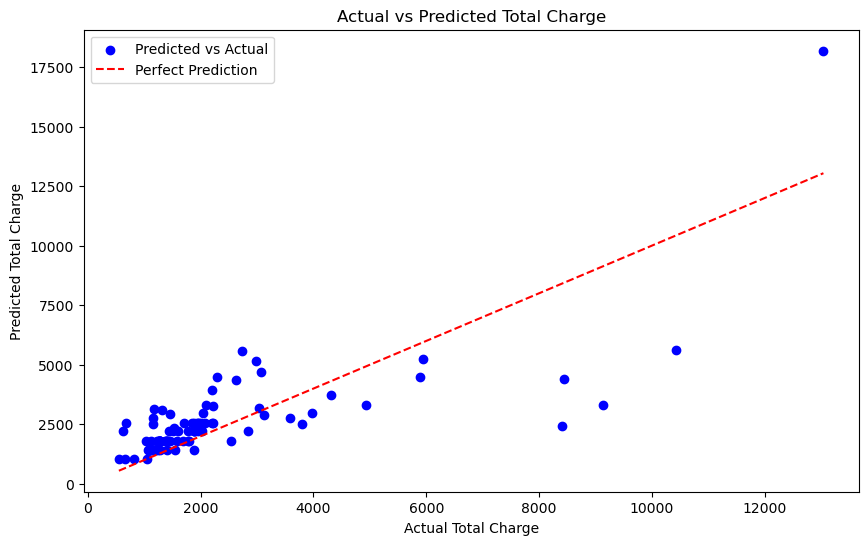

In [48]:
# X = df[['AGE', 'FEMALE', 'LOS', 'RACE']].values.reshape(-1, 4)  # Reshape to 2D array
# Y = df['TOTCHG'].values.reshape(-1, 1)  # Reshape to 2D array
X = df[['AGE', 'FEMALE', 'LOS', 'RACE']].values.reshape(-1, 4)  # Reshape to 2D array
Y = df['TOTCHG'].values.reshape(-1, 1)  # Reshape to 2D array
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

class Linear_regression():
    def __init__(self,learning_rate,no_of_itr):
        self.learning_rate=learning_rate
        self.no_of_itr=no_of_itr
    def fit(self,X,Y):
        self.m, self.n=X.shape #(100,4) means 100 samples 4 features 
        self.w=np.zeros((self.n,1))
        #initializing weights and biases
        #For example, if self.n is 4, then self.w will be a column vector with 4 rows, all initialized to zero.
        #These weights will be updated during the training process to minimize the error in predictions.
        self.b=0
        self.X=X
        self.Y=Y
        #gradient descent ,in each  iteration we find the value of weights and biases and then update the value of weights and biases
        #till the y value doesnot converge at a point ie global minima 
        for i in range(self.no_of_itr):
            self.update_weights()
    def update_weights(self):
        Y_predicted=self.predict(self.X)
         #calculating gradient
        dw = -(self.X.T).dot(self.Y - Y_predicted)/self.m 
        db = -np.sum(self.Y - Y_predicted)/self.m 
         #updating weights and biases
        self.w = self.w - self.learning_rate * dw 
        self.b = self.b - self.learning_rate * db 
    def predict(self,X):
        return (X.dot(self.w) + self.b)
    def print_weights(self): 
        print('Weights for the respective features are :') 
        print(self.w) 
        print() 
  
        print('Bias value for the regression is ', self.b) 
    def r_squared(self, Y_actual, Y_predicted):
        # Calculate R-squared
        ss_total = np.sum((Y_actual - np.mean(Y_actual)) ** 2)  # Total sum of squares
        ss_residual = np.sum((Y_actual - Y_predicted) ** 2)  # Residual sum of squares
        r2 = 1 - (ss_residual / ss_total)  # R-squared
        return r2    
        
model = Linear_regression(learning_rate=0.001, no_of_itr=2000) 
model.fit(X_train, Y_train)
model.print_weights()

# Visualize the results
Y_predicted = model.predict(X_test)
r2 = model.r_squared(Y_test, Y_predicted)
print('R-squared:', r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_predicted, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Total Charge')
plt.ylabel('Predicted Total Charge')
plt.title('Actual vs Predicted Total Charge')
plt.legend()
plt.show()